
# **NOTEBOOK EDA POWERLIFTING**


Tuve que reiniciarlo, ya que limpié mal los datos

#### Importamos las librerías y el dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [19]:
df_power = pd.read_csv("../data/raw/openpowerlifting-2023-12-16-fb2308df.csv")

###

#### Creamos una copia para trabajar sobre el, empezamos a limpiar datos

In [ ]:
df_power3 = df_power.copy()


Miramos cuantos nulos contiene este dataset para poder limpiarlo. Es importante saber que los nulos son datos faltantes y no levantamientos fallidos, ya que los levantantamientos fallidos se muestran en negativo.  *revisar*

In [1]:
df_power3.Age.value_counts(dropna = False) #mirar nulos

NameError: name 'df_power3' is not defined

Por lo que pongo los valores de los levantamientos (squat, deadlift, bench, goodlift y wilks) en valores 0, ya que algunas federaciones solo ponen los levantamientos relevantes o el resultado final. Y en otras,pongo la media.

In [ ]:
df_power3.loc[df_power3["Country"].isna(),"Country"] = df_power3["Country"].mode().values[0]

Compruebo el Nan de las columnas en las cuales me quedaban dudas

In [ ]:
age_nan = df_power3["Age"].isna() #nos da el nan de las olumnas elegidas
ageclass_nan= df_power3["AgeClass"].isna()
country_nan = df_power3["Country"].isna()
df_power3.loc[age_nan & ageclass_nan & country_nan]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName


Elimino filas con Nan y columas

In [ ]:
df_power3.dropna(axis = "index", inplace = True) 
df_power3.drop(columns = 'MeetTown', inplace = True)

In [ ]:
eliminated_col = ['Bench4Kg','Deadlift4Kg', 'Squat4Kg','MeetState', 'Best3SquatKg','Best3BenchKg','Best3DeadliftKg', 'Glossbrenner', 'Tested', 'MeetCountry', 'Wilks','ParentFederation', 'State','Dots', 'BirthYearClass', ]

df_power3.drop(columns = eliminated_col, inplace = True)

In [ ]:
#mirar por nombre
name = 'R. Gabe Pyne'
filtered_rows = df_power3[df_power3['Name'].str.contains(name, na=True)].copy()

filtered_rows

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,TotalKg,Place,Goodlift,Country,Federation,Date,MeetName
1170307,R. Gabe Pyne,M,SBD,Raw,14.0,13-15,M_TCR_1_AWPC,42.0,52,53.0,...,72.5,78.0,82.5,188.0,1,37.35,USA,WPC,2020-09-03,World Cup
1200157,R. Gabe Pyne,M,SBD,Wraps,15.0,13-15,M_OCR_AAPF,47.8,52,80.0,...,107.5,115.0,120.0,267.5,1,49.57,USA,WPC,2021-09-02,World Cup
1200166,R. Gabe Pyne,M,SBD,Wraps,15.0,13-15,M_TCR_1_AAPF,47.8,52,80.0,...,107.5,115.0,120.0,267.5,1,49.57,USA,WPC,2021-09-02,World Cup


In [ ]:
df_power3.Squat3Kg.value_counts(dropna = False) #mirar nulos

Squat3Kg
120.00    5
117.50    2
195.00    2
93.50     2
137.50    2
152.50    2
177.50    2
102.50    2
232.50    2
90.00     2
182.50    1
285.00    1
148.00    1
60.00     1
282.50    1
97.50     1
142.50    1
163.29    1
106.59    1
205.00    1
190.00    1
122.50    1
180.50    1
127.50    1
62.50     1
197.50    1
180.00    1
215.00    1
70.00     1
125.50    1
120.50    1
88.45     1
110.00    1
111.13    1
172.50    1
240.00    1
185.97    1
149.69    1
184.16    1
142.88    1
61.23     1
161.03    1
112.50    1
Name: count, dtype: int64

Compruebo las columnas de nuevo, para ver datos relevantes para el posible análisis. Es posible que tenga que eliminar columnas que luego no encuentre utilidad en sus datos.


Paso las fechas a datetime

In [ ]:
df_power3['Date'] = pd.to_datetime(df_power3['Date'])

In [ ]:

df_power3.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'TotalKg', 'Place', 'Goodlift', 'Country', 'Federation',
       'Date', 'MeetName'],
      dtype='object')

Ahora empezamos el análisis de datos

## ANÁLISIS DEL DATASET

En esta parte es muy importante hacerse preguntas para poder obtener respuestas para poder representarla en gráficos.
 
-El que tiene más puntuación en Goodlifts, no es necesariamente el más fuerte en todas las marcas.

-¿Hay una mejora en marcas a lo largo de los años desde que tenemos información? A medida que pasan los años, los jóvenes destacan más con sus marcas?

-Es relevante la edad del sujeto en cada categoría? 

-En relación peso corporal, hay mucha diferencia entre marcas de una categoría de peso a otra? Es decir, cuantas veces levanta su propio peso. 

Lo primero que hago es comporbar columnas para ver que quiero incluir en el EDA

In [ ]:
df_dl = df_power3[['Name', 'Goodlift', 'TotalKg', 'Country','Place',  'AgeClass', 'Division', 'Age', 'Federation',]].head(30)
df_dl

,Name,Goodlift,TotalKg,Country,Place,AgeClass,Division,Age,Federation
88095,Laura Cullen,61.05,320.00,Canada,1,35-39,S35-39,38.0,WRPF-CAN
1170293,Brittney Shawver,61.43,285.00,USA,1,24-34,F_SR_AWPC,34.0,WPC
1170307,R. Gabe Pyne,37.35,188.00,USA,1,13-15,M_TCR_1_AWPC,14.0,WPC
1200108,Vivienne Shockley,46.57,242.50,USA,1,40-44,F_MR_1_AAPF,40.0,WPC
1200109,Sheryl Shockley,56.24,290.00,USA,1,60-64,F_MR_5_AAPF,64.0,WPC
1200157,R. Gabe Pyne,49.57,267.50,USA,1,13-15,M_OCR_AAPF,15.0,WPC
1200166,R. Gabe Pyne,49.57,267.50,USA,1,13-15,M_TCR_1_AAPF,15.0,WPC
1762139,Gary Teeter,59.35,396.50,USA,1,55-59,Masters 55-59,56.0,WRPF
1763863,Gary Teeter,59.14,383.00,USA,1,55-59,Masters 55-59,56.0,WRPF
2007991,Carol Moorhead,46.53,233.60,USA,1,55-59,Open,55.0,APA


In [ ]:
competidores_open = df_power3[df_power3['Division'] == 'Open']
competidores_open

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,TotalKg,Place,Goodlift,Country,Federation,Date,MeetName
2007991,Carol Moorhead,F,SBD,Wraps,55.0,55-59,Open,74.39,75,79.38,...,88.45,92.99,97.52,233.60,1,46.53,USA,APA,2017-04-22,ShowMe State Raw Championships
2007992,Nancy Lowther,F,SBD,Wraps,58.0,55-59,Open,87.09,90,90.72,...,102.06,111.13,115.67,297.10,1,55.35,USA,APA,2017-04-22,ShowMe State Raw Championships
2009101,Shannon Miranda,F,SBD,Raw,31.0,24-34,Open,67.13,67.5,97.52,...,124.74,129.27,133.81,308.44,1,64.91,USA,APA,2022-03-26,State Spring Open
2015766,Kerryn Havermale,F,SBD,Raw,30.0,24-34,Open,107.95,90+,136.08,...,165.56,172.37,179.17,394.63,1,69.07,USA,APA,2021-12-04,West Virginia State Championships
2018859,Latavia Harris,F,SBD,Wraps,26.0,24-34,Open,88.54,90,145.15,...,142.88,165.56,185.97,451.32,1,83.58,USA,APA,2020-10-10,Midwest Gods of Iron II
2069810,Cody Large,M,SBD,Raw,33.0,24-34,Open,103.30,110,210.00,...,255.00,270.00,275.00,672.50,1,83.67,USA,USPA,2019-09-21,Drug Tested Louisiana-Mississippi Championship
2071204,Rosie Pulido,F,SBD,Wraps,32.0,24-34,Open,67.70,75,152.50,...,182.50,190.00,195.00,467.50,1,97.90,USA,USPA,2021-05-16,Drug Tested NASPOWER Powerlifting Championship
2077922,Foster Adams,M,SBD,Raw,35.0,35-39,Open,158.90,140+,177.50,...,187.50,200.00,212.50,582.50,1,60.52,USA,USPA,2023-11-18,Drug Tested Battle Born Championships Volume 2
2084317,Bobby Brown,M,SBD,Wraps,40.0,40-44,Open,92.00,100,130.00,...,167.50,190.00,195.00,527.50,1,69.37,USA,USPA,2022-02-05,Drug Tested Alabama State Championship
2142711,Casey Caldwell,F,SBD,Raw,35.0,35-39,Open,97.90,100,-122.50,...,145.00,147.50,150.00,365.00,1,65.48,USA,USPA,2022-09-10,Drug Tested Honor the Fallen


In [ ]:
#mirar por nombre
name = 'R. Gabe Pyne'
filtered_rows = df_power3[df_power3['Name'].str.contains(name, na=True)].copy()

filtered_rows

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,TotalKg,Place,Goodlift,Country,Federation,Date,MeetName
1170307,R. Gabe Pyne,M,SBD,Raw,14.0,13-15,M_TCR_1_AWPC,42.0,52,53.0,...,72.5,78.0,82.5,188.0,1,37.35,USA,WPC,2020-09-03,World Cup
1200157,R. Gabe Pyne,M,SBD,Wraps,15.0,13-15,M_OCR_AAPF,47.8,52,80.0,...,107.5,115.0,120.0,267.5,1,49.57,USA,WPC,2021-09-02,World Cup
1200166,R. Gabe Pyne,M,SBD,Wraps,15.0,13-15,M_TCR_1_AAPF,47.8,52,80.0,...,107.5,115.0,120.0,267.5,1,49.57,USA,WPC,2021-09-02,World Cup


Para responder la primera pregunta ('El que tiene más puntuación en Goodlifts, no es necesariamente el más fuerte en todas las marcas'), empiezo  a sacar información relevante de los atletas más fuertes.


In [ ]:
top_men = df_power3[(df_power3['Sex'] == 'M')].nlargest(12, 'Goodlift')
top_women = df_power3[(df_power3['Sex'] == 'F')].nlargest(11, 'Goodlift')


print("Top 10 Hombres con Goodlift más alto:")
top_men[['Name', 'Goodlift']]



Top 10 Hombres con Goodlift más alto:


,Name,Goodlift
2136900,Max Shethar,89.25
2148475,Jacob Mcgaha,86.82
2069810,Cody Large,83.67
2167865,Willis Dewane,77.97
2109255,Cody Hayes,72.14
2256882,Paul Baxter,71.67
2256901,Paul Baxter,71.67
2084317,Bobby Brown,69.37
2084319,Bobby Brown,69.37
2173081,Sean Fairbanks,67.93


Para completar datos, tuve que buscar los datos de Natalie Do, ya que era una atleta muy fuerte y podía salir en el ranking de goodlifts

In [ ]:
#relleno los valores de Natalie Do
index_of_natalie_do = df_top_women[df_top_women['Name'] == 'Natalie Do'].index[0]

df_top_women.loc[index_of_natalie_do, 'Squat1Kg'] = 115.0
df_top_women.loc[index_of_natalie_do, 'Squat2Kg'] = 122.5
df_top_women.loc[index_of_natalie_do, 'Squat3Kg'] = 127.5
df_top_women.loc[index_of_natalie_do, 'Bench1Kg'] = 60.0
df_top_women.loc[index_of_natalie_do, 'Bench2Kg'] = 62.5
df_top_women.loc[index_of_natalie_do, 'Bench3Kg'] = 67.5
df_top_women.loc[index_of_natalie_do, 'Deadlift1Kg'] = 160.0
df_top_women.loc[index_of_natalie_do, 'Deadlift2Kg'] = 168.0
df_top_women.loc[index_of_natalie_do, 'Deadlift3Kg'] = -172.5

df_top_women

NameError: name 'df_top_women' is not defined

In [ ]:
print("\nTop 10 Mujeres con Goodlift más alto:")
top_women[['Name', 'Goodlift']]


Top 10 Mujeres con Goodlift más alto:


,Name,Goodlift
2071204,Rosie Pulido,97.90
2018859,Latavia Harris,83.58
2196100,Sharon Bohling,78.92
2174447,Kiley Kennis,77.30
2151040,Alexis Dunn,76.76
2161882,Kathryn Tranum,76.40
2230491,Janine Jadallah,76.35
2160820,Miranda Churchward,75.80
2015766,Kerryn Havermale,69.07
2241921,Margie Haddon,66.57


In [ ]:
Empiezo a sacar gráficas de datos relevantes

SyntaxError: invalid syntax (1774133356.py, line 1)

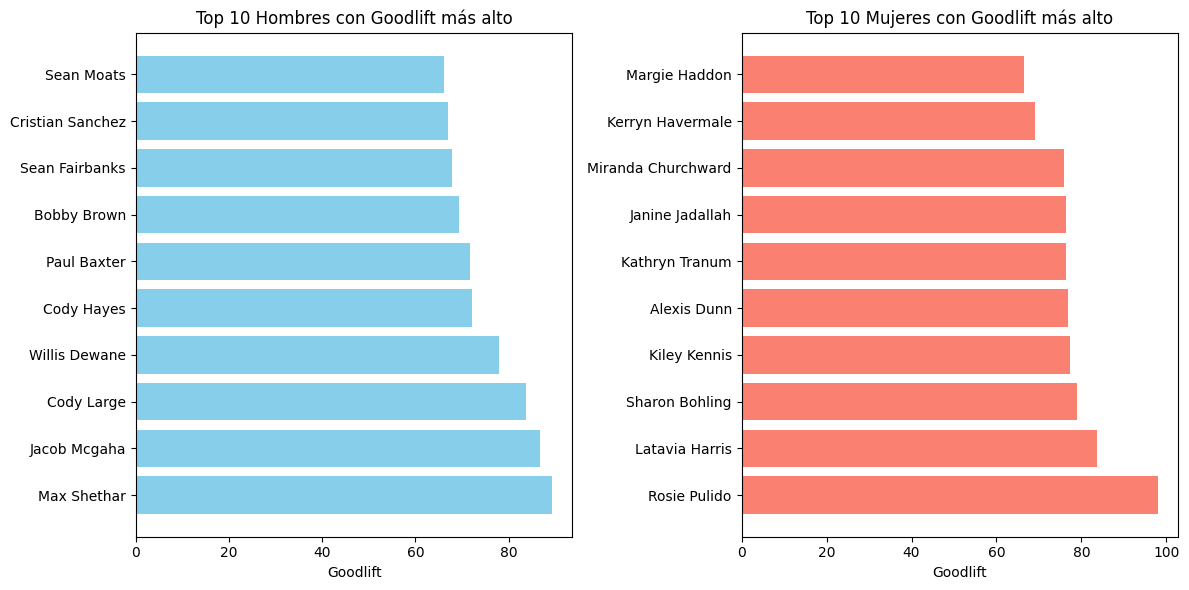

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_men['Name'], top_men['Goodlift'], color='skyblue')
plt.xlabel('Goodlift')
plt.title('Top 10 Hombres con Goodlift más alto')

plt.subplot(1, 2, 2)
plt.barh(top_women['Name'], top_women['Goodlift'], color='salmon')
plt.xlabel('Goodlift')
plt.title('Top 10 Mujeres con Goodlift más alto')

plt.tight_layout()
plt.show()

El que tiene más puntuación en Goodlifts, no es necesariamente el más fuerte en todas las marcas.

In [ ]:
top_women = df_power3[(df_power3['Sex'] == 'F')].nlargest(30, 'Goodlift')

C:\Users\enrik\AppData\Local\Temp\ipykernel_30328\450978289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_lifts['Squat_mean'] = df_power_lifts[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].mean(axis=1)
C:\Users\enrik\AppData\Local\Temp\ipykernel_30328\450978289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power_lifts['Bench_mean'] = df_power_lifts[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].mean(axis=1)
C:\Users\enrik\AppData\Local\Temp\ipykernel_30328\450978289.py:8: SettingWithCopyWarning: 
A v

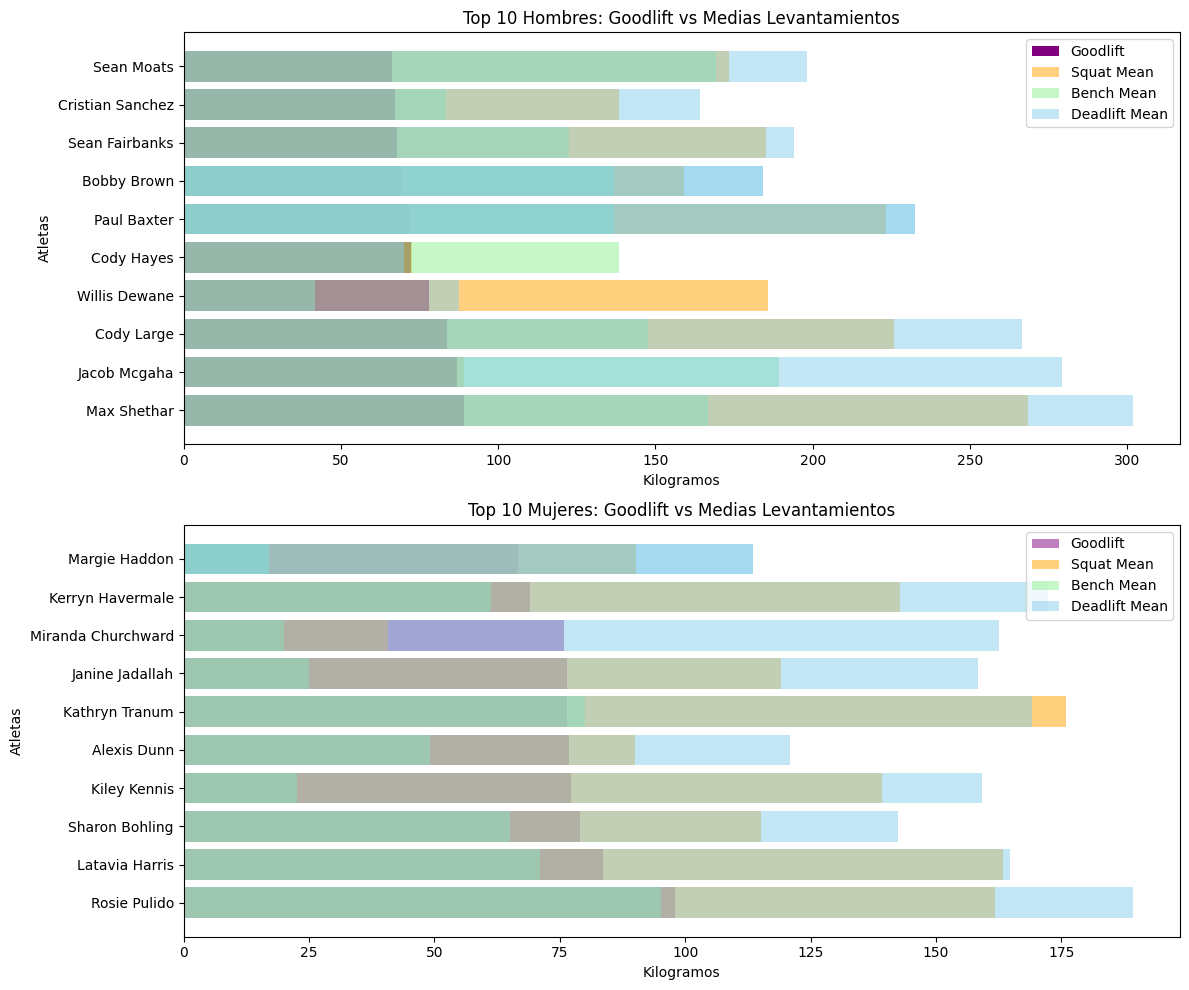

In [ ]:

columns_to_keep = ['Name', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
                   'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
                   'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Goodlift']

df_power_lifts = df_power3[columns_to_keep]
df_power_lifts['Squat_mean'] = df_power_lifts[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].mean(axis=1)
df_power_lifts['Bench_mean'] = df_power_lifts[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].mean(axis=1)
df_power_lifts['Deadlift_mean'] = df_power_lifts[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].mean(axis=1)

top_men = df_power_lifts[df_power3['Sex'] == 'M'].nlargest(12, 'Goodlift')
top_women = df_power_lifts[df_power3['Sex'] == 'F'].nlargest(11, 'Goodlift')

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))


axs[0].barh(top_men['Name'], top_men['Goodlift'], color='purple', label='Goodlift')
axs[0].barh(top_men['Name'], top_men['Squat_mean'], color='orange', alpha=0.5, label='Squat Mean')
axs[0].barh(top_men['Name'], top_men['Bench_mean'], color='lightgreen', alpha=0.5, label='Bench Mean')
axs[0].barh(top_men['Name'], top_men['Deadlift_mean'], color='skyblue', alpha=0.5, label='Deadlift Mean')
axs[0].set_ylabel('Atletas')
axs[0].set_xlabel('Kilogramos')
axs[0].set_title('Top 10 Hombres: Goodlift vs Medias Levantamientos')
axs[0].legend()


axs[1].barh(top_women['Name'], top_women['Goodlift'], color='purple', alpha=0.5, label='Goodlift')
axs[1].barh(top_women['Name'], top_women['Squat_mean'], color='orange', alpha=0.5, label='Squat Mean')
axs[1].barh(top_women['Name'], top_women['Bench_mean'], color='lightgreen', alpha=0.5, label='Bench Mean')
axs[1].barh(top_women['Name'], top_women['Deadlift_mean'], color='skyblue', alpha=0.5, label='Deadlift Mean')
axs[1].set_ylabel('Atletas')
axs[1].set_xlabel('Kilogramos')
axs[1].set_title('Top 10 Mujeres: Goodlift vs Medias Levantamientos')
axs[1].legend()

plt.tight_layout()
plt.show()

Otros datos que he usado hasta llegar a la gráfica, que al final no han sido útiles del todo.

In [ ]:
#Función para ver los 10 primeros competidores y sus marcas
def top_unique_names_with_total(df_power3, sex, n):
    columns_to_show = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']
    
    top_sex = df_power3[(df_power3['Sex'] == sex) & (df_power3['Equipment'] == 'Raw')].nlargest(n, 'Goodlift')
    unique_names = top_sex['Name'].unique()
    top_unique = top_sex[top_sex['Name'].isin(unique_names)]
    top_unique_no_duplicates = top_unique.drop_duplicates(subset='Name')
    return top_unique_no_duplicates[['Name', 'Goodlift', 'TotalKg'] + columns_to_show]


top_men_unique = top_unique_names_with_total(df_power3, 'M', 10)
top_women_unique = top_unique_names_with_total(df_power3, 'F', 10)
df_top_men = pd.DataFrame(top_men_unique)
df_top_women = pd.DataFrame(top_women_unique)

In [ ]:
df_top_men

,Name,Goodlift,TotalKg,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg
2136900,Max Shethar,89.25,782.50,250.00,270.00,285.00,155.00,167.5,177.50,282.50,302.50,320.00
2148475,Jacob Mcgaha,86.82,782.50,255.00,-270.00,282.50,180.00,187.5,200.00,257.50,280.00,300.00
2069810,Cody Large,83.67,672.50,210.00,227.50,240.00,137.50,147.5,157.50,255.00,270.00,275.00
2167865,Willis Dewane,77.97,545.00,175.00,185.00,197.50,-100.00,110.0,115.00,-200.00,230.00,232.50
2109255,Cody Hayes,72.14,562.50,-202.50,205.00,215.00,130.00,140.0,145.00,-185.00,192.50,202.50
2256882,Paul Baxter,71.67,615.00,215.00,222.50,232.50,130.00,137.5,142.50,225.00,232.50,240.00
2173081,Sean Fairbanks,67.93,522.50,180.00,185.00,190.00,115.00,122.5,130.00,185.00,195.00,202.50
2138529,Cristian Sanchez,67.07,420.50,125.00,142.50,148.00,80.00,83.0,87.50,142.50,165.00,185.00
2014119,Sean Moats,66.09,571.98,161.03,174.63,184.16,158.76,170.1,179.17,185.97,199.58,208.65


In [ ]:
df_top_women

,Name,Goodlift,TotalKg,Squat1Kg,Squat2Kg,Squat3Kg,Bench1Kg,Bench2Kg,Bench3Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg
2196100,Sharon Bohling,78.92,342.50,107.50,115.00,122.50,60.0,65.00,70.00,135.00,142.50,150.00
2174447,Kiley Kennis,77.30,402.50,125.00,140.00,152.50,65.0,-72.50,75.00,145.00,157.50,175.00
2151040,Alexis Dunn,76.76,277.50,82.50,90.00,97.50,45.0,50.00,52.50,112.50,122.50,127.50
2161882,Kathryn Tranum,76.40,445.00,167.50,177.50,182.50,75.0,80.00,85.00,160.00,170.00,177.50
2015766,Kerryn Havermale,69.07,394.63,136.08,142.88,149.69,56.7,61.23,65.77,165.56,172.37,179.17
2241921,Margie Haddon,66.57,261.00,85.00,92.00,93.50,51.0,-52.00,52.00,110.50,114.50,115.50
2142711,Casey Caldwell,65.48,365.00,-122.50,130.00,137.50,70.0,75.00,77.50,145.00,147.50,150.00
2009101,Shannon Miranda,64.91,308.44,97.52,104.33,106.59,63.5,65.77,68.04,124.74,129.27,133.81


In [ ]:
competidoras_open = df_power3[(df_power3['Division'] == 'Open') & (df_power3['Sex'] == 'F')]
competidoras_open


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,TotalKg,Place,Goodlift,Country,Federation,Date,MeetName
2007991,Carol Moorhead,F,SBD,Wraps,55.0,55-59,Open,74.39,75,79.38,...,88.45,92.99,97.52,233.60,1,46.53,USA,APA,2017-04-22,ShowMe State Raw Championships
2007992,Nancy Lowther,F,SBD,Wraps,58.0,55-59,Open,87.09,90,90.72,...,102.06,111.13,115.67,297.10,1,55.35,USA,APA,2017-04-22,ShowMe State Raw Championships
2009101,Shannon Miranda,F,SBD,Raw,31.0,24-34,Open,67.13,67.5,97.52,...,124.74,129.27,133.81,308.44,1,64.91,USA,APA,2022-03-26,State Spring Open
2015766,Kerryn Havermale,F,SBD,Raw,30.0,24-34,Open,107.95,90+,136.08,...,165.56,172.37,179.17,394.63,1,69.07,USA,APA,2021-12-04,West Virginia State Championships
2018859,Latavia Harris,F,SBD,Wraps,26.0,24-34,Open,88.54,90,145.15,...,142.88,165.56,185.97,451.32,1,83.58,USA,APA,2020-10-10,Midwest Gods of Iron II
2019470,Georgianne Puckett,F,SBD,Wraps,44.0,40-44,Open,57.95,60,0.00,...,0.00,0.00,0.00,239.04,1,55.39,USA,APA,2009-02-28,All RAW Northwest Regional Championships
2071204,Rosie Pulido,F,SBD,Wraps,32.0,24-34,Open,67.70,75,152.50,...,182.50,190.00,195.00,467.50,1,97.90,USA,USPA,2021-05-16,Drug Tested NASPOWER Powerlifting Championship
2142711,Casey Caldwell,F,SBD,Raw,35.0,35-39,Open,97.90,100,-122.50,...,145.00,147.50,150.00,365.00,1,65.48,USA,USPA,2022-09-10,Drug Tested Honor the Fallen
2151040,Alexis Dunn,F,SBD,Raw,19.0,18-19,Open,47.10,48,82.50,...,112.50,122.50,127.50,277.50,3,76.76,USA,USPA,2022-06-25,Drug Tested San Jose Fit Expo
2160820,Miranda Churchward,F,SBD,Wraps,31.0,24-34,Open,65.50,67.5,-112.50,...,152.50,165.00,170.00,355.00,1,75.80,USA,USPA,2023-03-04,Drug Tested Ironville Classic


Esta función, nos sirve también para ver que los atletas de élite más ligeros, pueden tener incluso más fuerza que los pesados en algunos movimientos eguún el peso corporal

In [ ]:

def mostrar_info(df, n):
    top_n = df.nlargest(n, 'Goodlift')
    info = top_n[['Name', 'Goodlift', 'BodyweightKg', 'Squat3Kg', 'Bench3Kg', 'Deadlift3Kg']]


    info['Squat_BW_ratio'] = info['Squat3Kg'] / info['BodyweightKg']     # Calcular la cantidad de veces que levanta su peso corporal en cada ejercicio
    info['Bench_BW_ratio'] = info['Bench3Kg'] / info['BodyweightKg']
    info['Deadlift_BW_ratio'] = info['Deadlift3Kg'] / info['BodyweightKg']
    
    return info

In [ ]:
relacion_peso= mostrar_info(df_power3, 10)
relacion_peso


C:\Users\enrik\AppData\Local\Temp\ipykernel_30328\645243160.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['Squat_BW_ratio'] = info['Squat3Kg'] / info['BodyweightKg']
C:\Users\enrik\AppData\Local\Temp\ipykernel_30328\645243160.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['Bench_BW_ratio'] = info['Bench3Kg'] / info['BodyweightKg']
C:\Users\enrik\AppData\Local\Temp\ipykernel_30328\645243160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Name,Goodlift,BodyweightKg,Squat3Kg,Bench3Kg,Deadlift3Kg,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio
2071204,Rosie Pulido,97.90,67.70,172.50,100.00,195.00,2.548006,1.477105,2.880355
2136900,Max Shethar,89.25,125.40,285.00,177.50,320.00,2.272727,1.415470,2.551834
2148475,Jacob Mcgaha,86.82,134.00,282.50,200.00,300.00,2.108209,1.492537,2.238806
2069810,Cody Large,83.67,103.30,240.00,157.50,275.00,2.323330,1.524685,2.662149
2018859,Latavia Harris,83.58,88.54,185.97,79.38,185.97,2.100407,0.896544,2.100407
2196100,Sharon Bohling,78.92,58.40,122.50,70.00,150.00,2.097603,1.198630,2.568493
2167865,Willis Dewane,77.97,77.80,197.50,115.00,232.50,2.538560,1.478149,2.988432
2174447,Kiley Kennis,77.30,80.60,152.50,75.00,175.00,1.892060,0.930521,2.171216
2151040,Alexis Dunn,76.76,47.10,97.50,52.50,127.50,2.070064,1.114650,2.707006
2161882,Kathryn Tranum,76.40,118.90,182.50,85.00,177.50,1.534903,0.714886,1.492851


Para hacer el gráfico, he añadido los ratios al df

In [ ]:

df_power3['Squat_mean'] = df_power3[['Squat1Kg', 'Squat2Kg', 'Squat3Kg']].mean(axis=1)
df_power3['Bench_mean'] = df_power3[['Bench1Kg', 'Bench2Kg', 'Bench3Kg']].mean(axis=1)
df_power3['Deadlift_mean'] = df_power3[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']].mean(axis=1)

df_power3['Squat_BW_ratio'] = df_power3['Squat_mean'] / df_power3['BodyweightKg']
df_power3['Bench_BW_ratio'] = df_power3['Bench_mean'] / df_power3['BodyweightKg']
df_power3['Deadlift_BW_ratio'] = df_power3['Deadlift_mean'] / df_power3['BodyweightKg']

In [ ]:
top_10_goodlift = df_power3.nlargest(10, 'Goodlift')
selected_columns = ['Name', 'BodyweightKg', 'Squat_BW_ratio', 'Bench_BW_ratio', 'Deadlift_BW_ratio']
top_10_goodlift[selected_columns]

,Name,BodyweightKg,Squat_BW_ratio,Bench_BW_ratio,Deadlift_BW_ratio
2071204,Rosie Pulido,67.70,2.387986,1.405711,2.794190
2136900,Max Shethar,125.40,2.139819,1.329080,2.405635
2148475,Jacob Mcgaha,134.00,0.665423,1.411692,2.083333
2069810,Cody Large,103.30,2.186189,1.427880,2.581478
2018859,Latavia Harris,88.54,1.844289,0.802613,1.861343
2196100,Sharon Bohling,58.40,1.969178,1.113014,2.440068
2167865,Willis Dewane,77.80,2.388603,0.535561,1.124679
2174447,Kiley Kennis,80.60,1.726634,0.279156,1.974773
2151040,Alexis Dunn,47.10,1.910828,1.043878,2.565464
2161882,Kathryn Tranum,118.90,1.478834,0.672834,1.422764


C:\Users\enrik\AppData\Local\Temp\ipykernel_30328\4043009545.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(selected_data['Name'], rotation=90)  # Rotar etiquetas en el eje x para mejorar la legibilidad


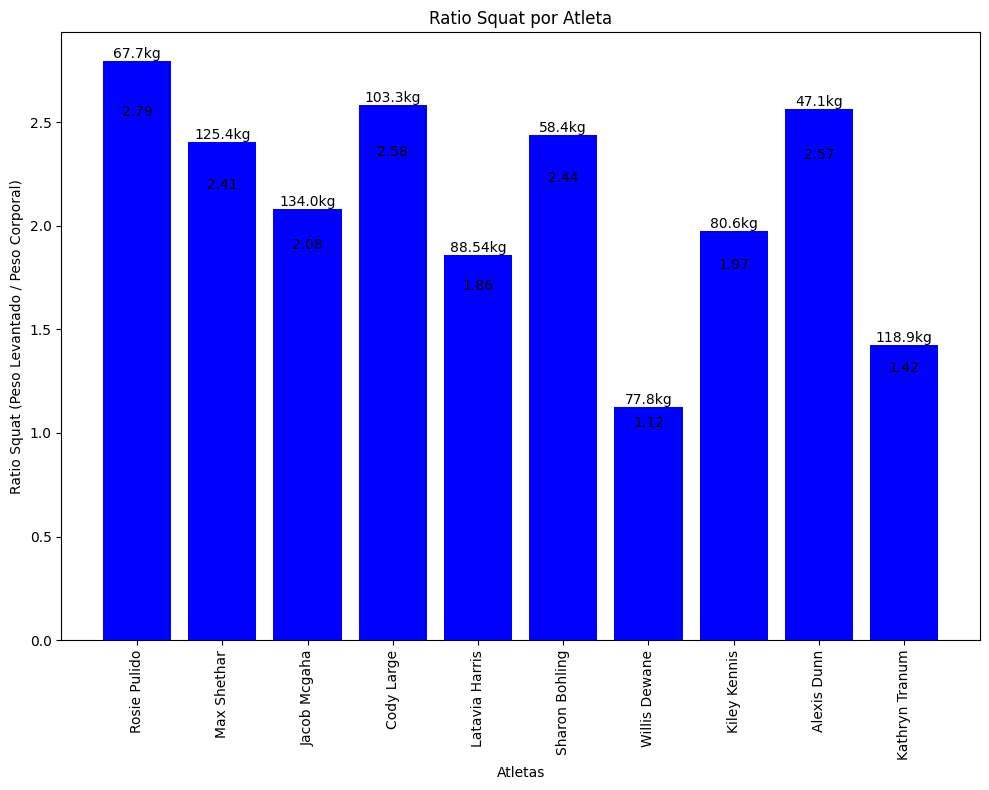

In [ ]:

selected_data = top_10_goodlift[['Name', 'BodyweightKg', 'Deadlift_BW_ratio']]

fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.bar(selected_data['Name'], selected_data['Deadlift_BW_ratio'], color='Blue')

ax.set_xlabel('Atletas')
ax.set_ylabel('Ratio Squat (Peso Levantado / Peso Corporal)')
ax.set_title('Ratio Squat por Atleta')
ax.set_xticklabels(selected_data['Name'], rotation=90)  # Rotar etiquetas en el eje x para mejorar la legibilidad

# Mostrar el peso corporal encima de cada barra
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{selected_data['BodyweightKg'].iloc[i]}kg",
            ha='center', va='bottom')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval - 0.1 * yval, round(yval, 2), ha='center', va='bottom')

# Ajustar diseño
plt.tight_layout()
plt.show()


C:\Users\enrik\AppData\Local\Temp\ipykernel_30328\3995229902.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(selected_data['Name'], rotation=90)  # Rotar etiquetas en el eje x para mejorar la legibilidad


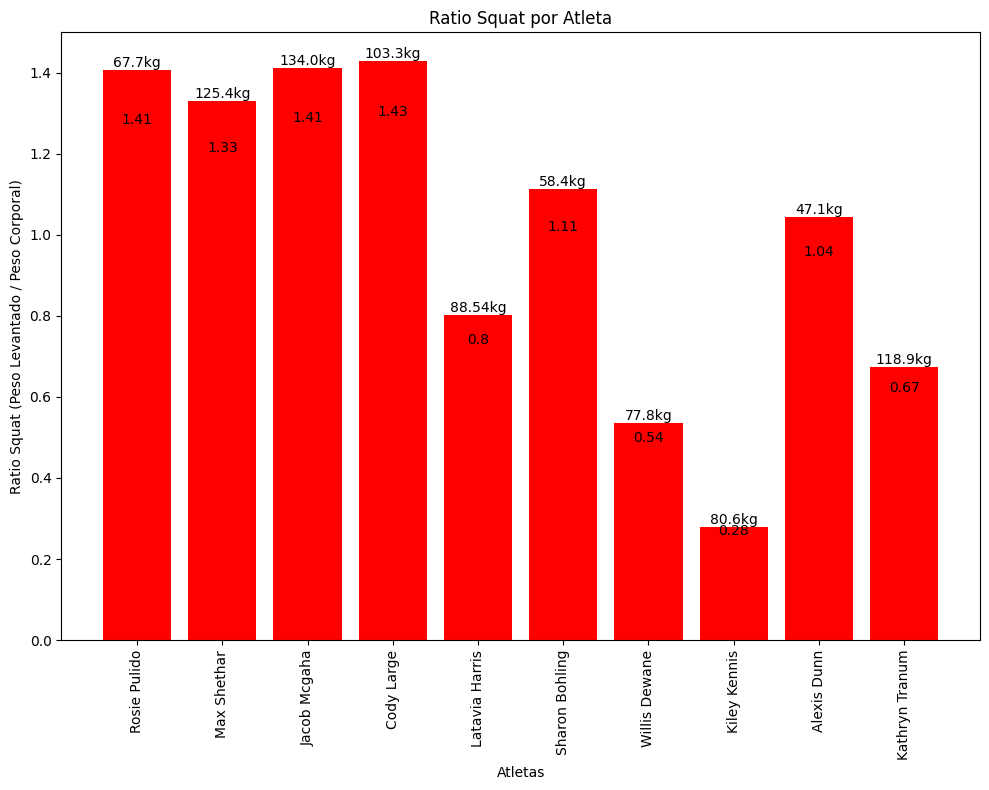

In [ ]:

selected_data = top_10_goodlift[['Name', 'BodyweightKg', 'Bench_BW_ratio']]

fig, ax = plt.subplots(figsize=(10, 8))


bars = ax.bar(selected_data['Name'], selected_data['Bench_BW_ratio'], color='Red')

ax.set_xlabel('Atletas')
ax.set_ylabel('Ratio Squat (Peso Levantado / Peso Corporal)')
ax.set_title('Ratio Squat por Atleta')
ax.set_xticklabels(selected_data['Name'], rotation=90)  # Rotar etiquetas en el eje x para mejorar la legibilidad

for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{selected_data['BodyweightKg'].iloc[i]}kg",
            ha='center', va='bottom')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval - 0.1 * yval, round(yval, 2), ha='center', va='bottom')
# Ajustar diseño
plt.tight_layout()
plt.show()


C:\Users\enrik\AppData\Local\Temp\ipykernel_30328\1771699773.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(selected_data['Name'], rotation=90)  # Rotar etiquetas en el eje x para mejorar la legibilidad


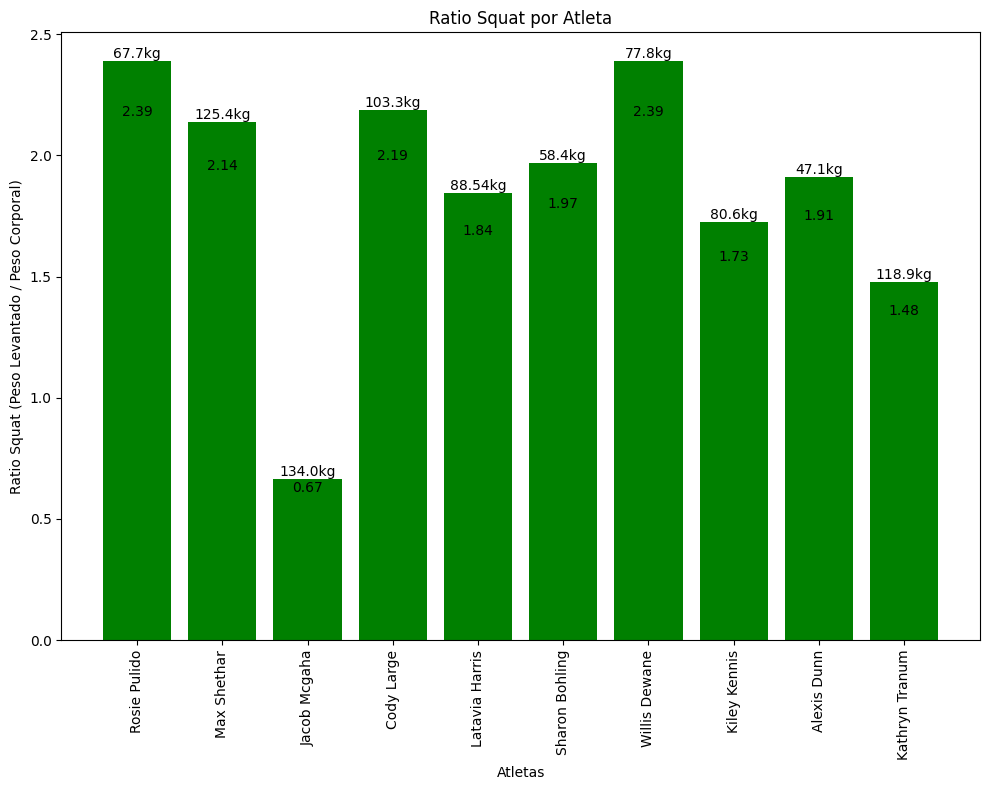

In [ ]:



selected_data = top_10_goodlift[['Name', 'BodyweightKg', 'Squat_BW_ratio']]


fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.bar(selected_data['Name'], selected_data['Squat_BW_ratio'], color='green')

ax.set_xlabel('Atletas')
ax.set_ylabel('Ratio Squat (Peso Levantado / Peso Corporal)')
ax.set_title('Ratio Squat por Atleta')
ax.set_xticklabels(selected_data['Name'], rotation=90) 


for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{selected_data['BodyweightKg'].iloc[i]}kg",
            ha='center', va='bottom')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval - 0.1 * yval, round(yval, 2), ha='center', va='bottom')



plt.tight_layout()
plt.show()




¿En la categoría OPEN, Hay una mejora en marcas a lo largo de los años? 

C:\Users\enrik\AppData\Local\Temp\ipykernel_3768\1301259840.py:7: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  promedio_wilks_por_año = df_power3.groupby('Year', 'Division' == 'Open')['Goodlift'].mean()


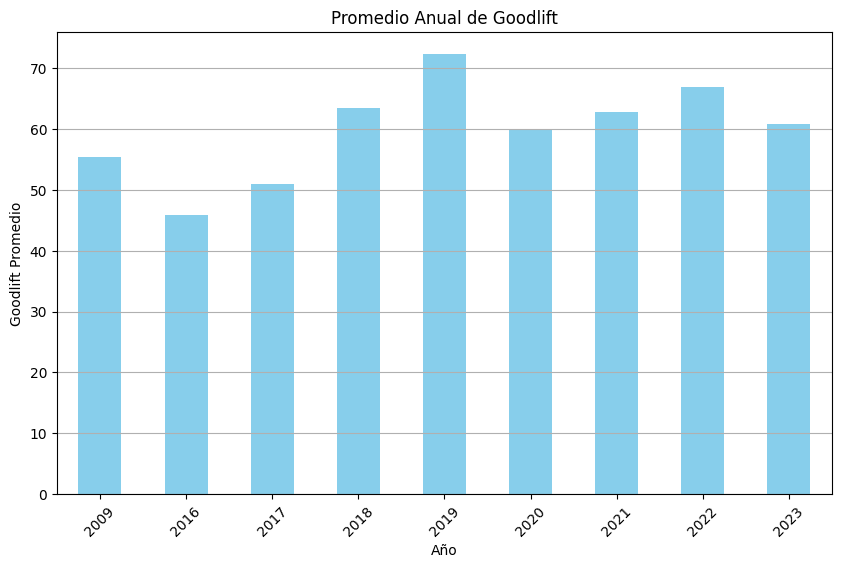

In [ ]:
#Mirar si las media de las marcas han mejorado a medida que pasan los años. 

# Extraer el año de la columna 'Date'
df_power3['Year'] = df_power3['Date'].dt.year

promedio_wilks_por_año = df_power3.groupby('Year', 'Division' == 'Open')['Goodlift'].mean()

plt.figure(figsize=(10, 6))
promedio_wilks_por_año.plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Goodlift Promedio')
plt.title('Promedio Anual de Goodlift')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:

df_2019 = df_power3[df_power3['Date'].dt.year== 2019]


max_wilks_2019 = df_2019[df_2019['Goodlift'] == df_2019['Goodlift'].max()]


print(max_wilks_2019[['Name', 'Goodlift', 'TotalKg']])

                Name  Goodlift  TotalKg
2136900  Max Shethar     89.25    782.5


In [ ]:
max_wilks = df_power3[df_power3['TotalKg'] == df_power3['TotalKg'].max()]


print(max_wilks[['Name', 'TotalKg']])

                 Name  TotalKg
1183050  Dave Hoff #1   1407.5


In [ ]:

def analyze_open_age(df_power3):
    df_open = df_power3[df_power3['Division'] == 'Open']

    grouped_by_year = df_open.groupby('Date').agg({
        'TotalKg':'sum',
        'Age':'mean',
        'Goodlift': 'mean'
    }).reset_index()

    
    grouped_by_age = df_open.groupby(['Date', 'Age']).agg({'TotalKg': 'sum'}).reset_index()


    return grouped_by_year, grouped_by_age

In [ ]:
df_power3.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'TotalKg', 'Place', 'Goodlift', 'Country', 'Federation',
       'Date', 'MeetName', 'Year'],
      dtype='object')

In [ ]:
def analyze_open_age(df_power3):
    df_open = df_power3[df_power3['Division'] == 'Open']

    grouped_by_year = df_open.groupby('Date').agg({
        'TotalKg':'sum',
        'Age':'mean',
        'Goodlift': 'mean'
    }).reset_index()  

    grouped_by_age = df_open.groupby(['Date', 'Age']).agg({'TotalKg': 'sum'}).reset_index()  # Convertir a DataFrame

    combined_df = grouped_by_year.merg(grouped_by_age, on='Date', suffixes=('_year', '_age'))

    return combined_df

In [ ]:
mejora_anos = analyze_open_age(df_power3)
mejora_anos

NameError: name 'analyze_open_age' is not defined

In [ ]:
grouped = df_power3[df_power3['Division'] == 'Open'].groupby(['Date', 'AgeClass'])
mean_by_date_age = grouped['Goodlift'].mean().reset_index()
mean_by_date_age

,Date,AgeClass,Goodlift
0,1964-09-05,16-17,63.680000
1,1964-09-05,20-23,86.280000
2,1964-09-05,24-34,86.345000
3,1964-09-05,40-44,63.230000
4,1965-09-04,16-17,72.900000
...,...,...,...
36536,2023-12-10,35-39,74.745652
36537,2023-12-10,40-44,58.162500
36538,2023-12-10,45-49,68.323333
36539,2023-12-10,50-54,83.596667


In [ ]:
top_athletes = df_power3['Name'].value_counts().head(30)
top_athletes

Name
R. Gabe Pyne           3
Paul Baxter            2
Georgianne Puckett     2
Casey Caldwell         2
Margie Haddon          2
Gary Teeter            2
Natalie Do             2
Bobby Brown            2
Dalton Lane            2
Foster Adams           2
Jacob Mcgaha           1
Alexis Dunn            1
Andrew Montes          1
Miranda Churchward     1
Kathryn Tranum         1
Larry Tilley           1
Sean Fairbanks         1
Willis Dewane          1
Cameron Davidson #1    1
Max Shethar            1
Kiley Kennis           1
Sharon Bohling         1
Gordon Santee          1
Eric Jin               1
Janine Jadallah        1
Seth Tovey             1
Cristian Sanchez       1
Laura Cullen           1
Trevor David           1
Brandon Nazworth       1
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

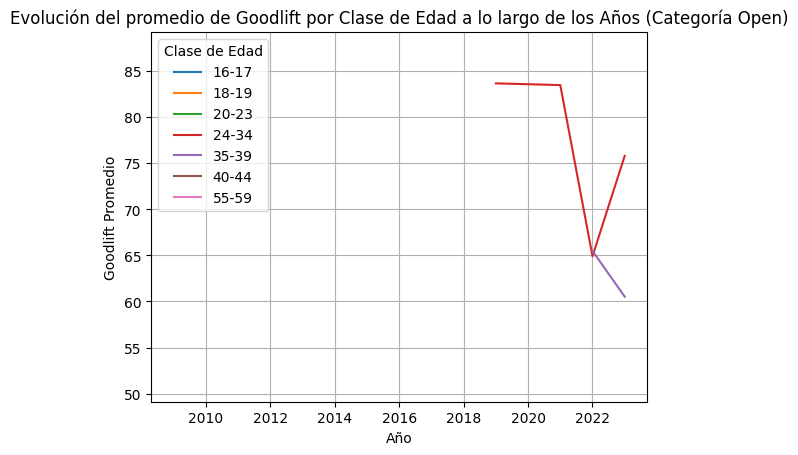

In [ ]:

df_open = df_power3[df_power3['Division'] == 'Open']

# Agrupa por año y clase de edad, calculando el promedio de 'Goodlift'
avg_goodlift_by_ageclass_year = df_open.groupby(['Year', 'AgeClass'])['Goodlift'].mean().unstack()

# Grafica la evolución del promedio de 'Goodlift' por clase de edad a lo largo de los años
plt.figure(figsize=(12, 8))
avg_goodlift_by_ageclass_year.plot(kind='line')
plt.title('Evolución del promedio de Goodlift por Clase de Edad a lo largo de los Años (Categoría Open)')
plt.xlabel('Año')
plt.ylabel('Goodlift Promedio')
plt.legend(title='Clase de Edad', loc='upper left')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

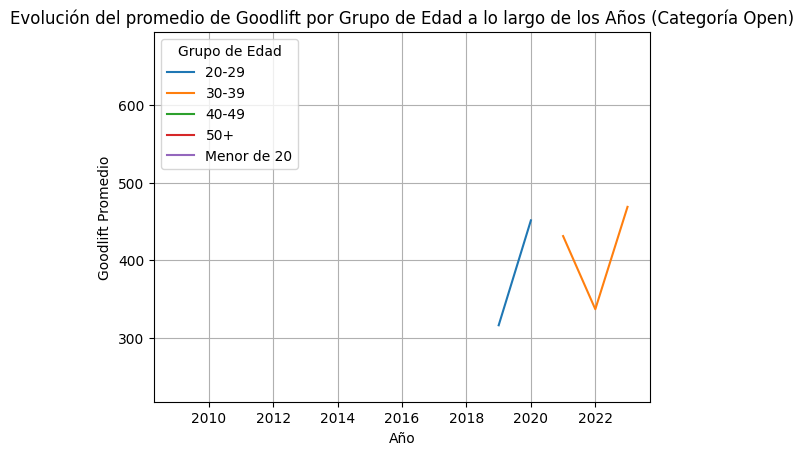

In [ ]:

def categorize_age(age):
    if age < 20:
        return 'Menor de 20'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    else:
        return '50+'


df_power3['AgeGroup'] = df_power3['Age'].apply(categorize_age) # Aplica la función para crear una nueva columna 'AgeGroup'




avg_goodlift_by_age_year = df_open.groupby(['Year', 'AgeGroup'])['TotalKg'].mean().unstack() # Agrupa por año y grupo de edad, calculando el promedio de 'Goodlift'

plt.figure(figsize=(12, 8))
avg_goodlift_by_age_year.plot(kind='line')
plt.title('Evolución del promedio de Goodlift por Grupo de Edad a lo largo de los Años (Categoría Open)')
plt.xlabel('Año')
plt.ylabel('Goodlift Promedio')
plt.legend(title='Grupo de Edad', loc='upper left')
plt.grid(True)
plt.show()

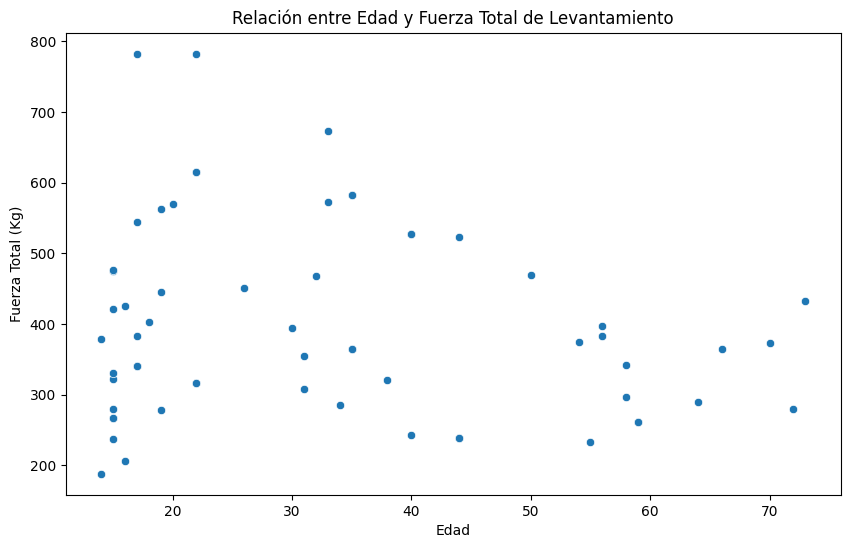

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalKg', data=df_power3)
plt.title('Relación entre Edad y Fuerza Total de Levantamiento')
plt.xlabel('Edad')
plt.ylabel('Fuerza Total (Kg)')
plt.show()

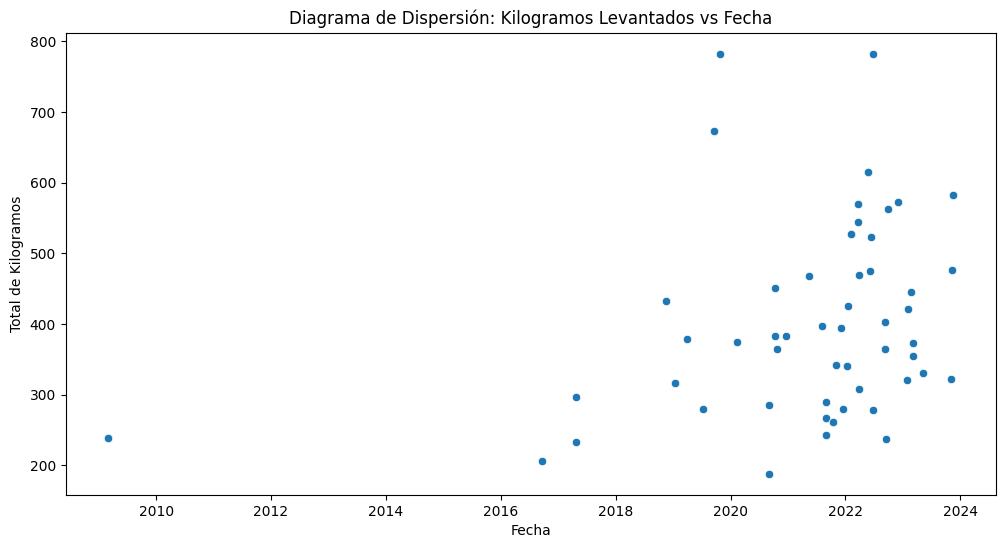

In [ ]:
#diagrama dispersion kg levantados vs fecha
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='TotalKg', data=df_power3)
plt.xlabel('Fecha')
plt.ylabel('Total de Kilogramos')
plt.title('Diagrama de Dispersión: Kilogramos Levantados vs Fecha')
plt.show()


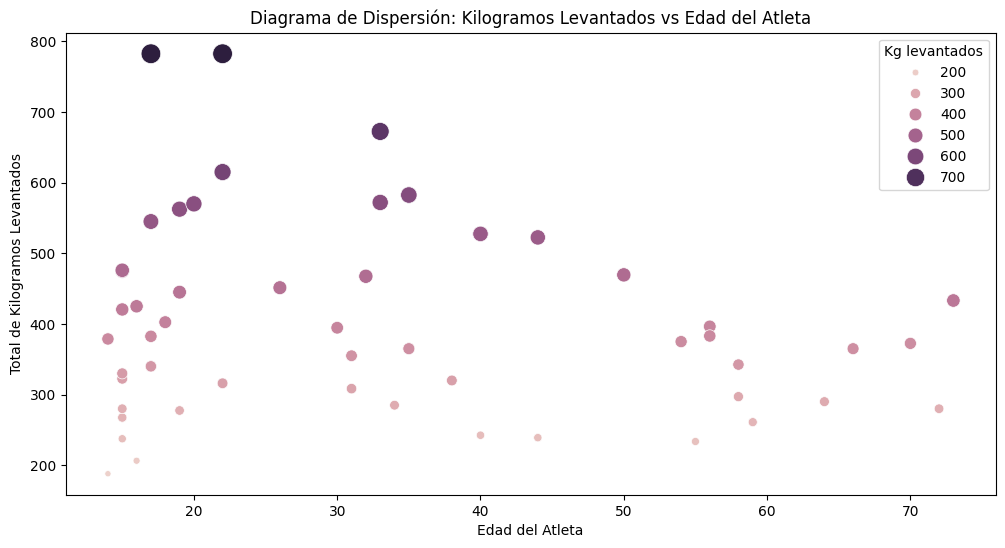

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='TotalKg', data=df_power3, hue='TotalKg', size='TotalKg', sizes=(20, 200))
plt.xlabel('Edad del Atleta')
plt.ylabel('Total de Kilogramos Levantados')
plt.title('Diagrama de Dispersión: Kilogramos Levantados vs Edad del Atleta')
plt.legend(title='Kg levantados')
plt.show()

#max sethard 19-20 años +700kg 140kg


TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

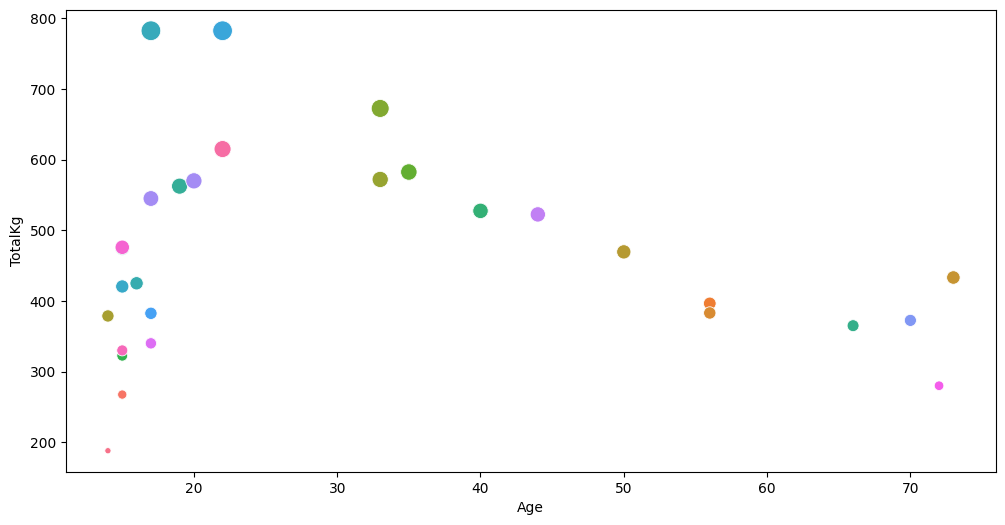

In [ ]:


plt.figure(figsize=(12, 6))

# Scatterplot para hombres
sns.scatterplot(x='Age', y='TotalKg', data=df_power3[df_power3['Sex'] == 'M'], hue='Date', size='TotalKg', sizes=(20, 200), label='Hombres')



plt.xlabel('Edad del Atleta')
plt.ylabel('Total de Kilogramos Levantados')
plt.title('Diagrama de Dispersión: Kilogramos Levantados vs Edad del Atleta (Separado por Género)')
plt.legend(title='Género')
plt.show()

TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

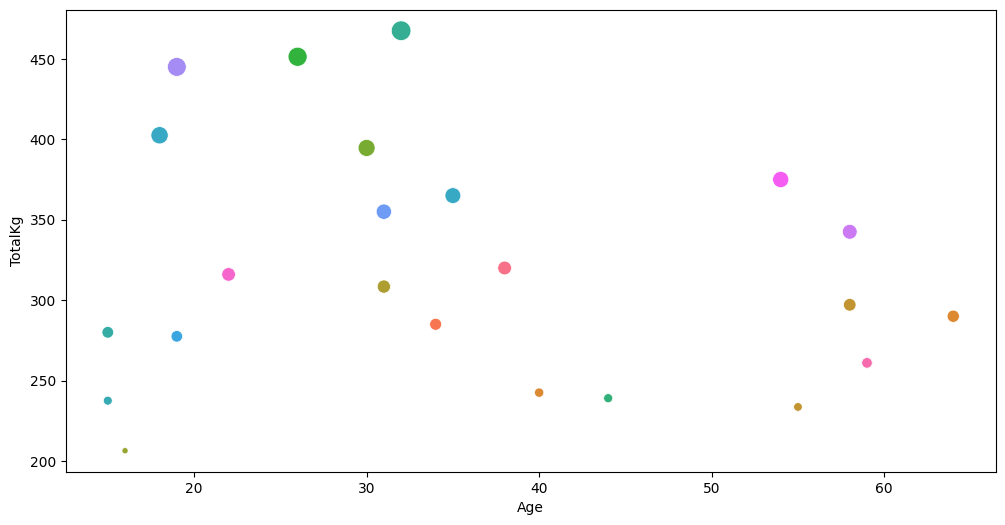

In [ ]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='TotalKg', data=df_power3[df_power3['Sex'] == 'F'], hue='Date', size='TotalKg', sizes=(20, 200), label='Mujeres')

plt.xlabel('Edad del Atleta')
plt.ylabel('Total de Kilogramos Levantados')
plt.title('Diagrama de Dispersión: Kilogramos Levantados vs Edad del Atleta (Separado por Género)')
plt.legend(title='Género')
plt.show()

In [ ]:
top_3_male_athletes = df_power3[df_power3['Sex'] == 'M'].nlargest(3, 'TotalKg')
top_3_female_athletes = df_power3[df_power3['Sex'] == 'F'].nlargest(3, 'TotalKg')

print("Top 3 atletas masculinos:")

print(top_3_male_athletes[['Name', 'TotalKg']])

print("\nTop 3 atletas femeninas:")
print(top_3_female_athletes[['Name', 'TotalKg']])

Top 3 atletas masculinos:
                 Name  TotalKg
2136900   Max Shethar    782.5
2148475  Jacob Mcgaha    782.5
2069810    Cody Large    672.5

Top 3 atletas femeninas:
                   Name  TotalKg
2071204    Rosie Pulido   467.50
2018859  Latavia Harris   451.32
2161882  Kathryn Tranum   445.00
